In [18]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix


In [19]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize to range [-1, 1]
])

In [20]:
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)


In [21]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)


In [22]:
train_images, train_labels = next(iter(train_loader))
test_images, test_labels = next(iter(test_loader))


In [23]:
print('Training Dataset: ', train_images.size(), train_labels.size())
print('Testing Dataset: ', test_images.size(), test_labels.size())
print(train_labels[:20])

Training Dataset:  torch.Size([64, 1, 28, 28]) torch.Size([64])
Testing Dataset:  torch.Size([64, 1, 28, 28]) torch.Size([64])
tensor([1, 8, 3, 4, 4, 6, 3, 5, 7, 3, 5, 2, 9, 6, 6, 4, 5, 9, 6, 7])


In [24]:
total_classes = np.unique(train_labels.numpy())
number_of_total_classes = len(total_classes)
print("Total Number of Output Classes : ", number_of_total_classes)
print('All Output Classes : ', total_classes)

Total Number of Output Classes :  10
All Output Classes :  [0 1 2 3 4 5 6 7 8 9]


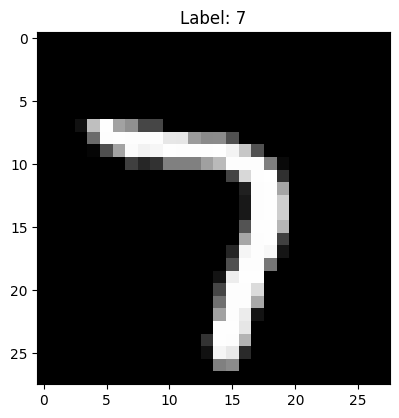

In [25]:
plt.figure(figsize=(10, 10))
plt.subplot(122)
plt.imshow(train_images[8][0], cmap='gray')
plt.title(f'Label: {train_labels[8].item()}')
plt.show()

In [26]:
newdimensionData = np.prod(train_images.shape[1:])

train_images = train_images.view(-1, newdimensionData)
test_images = test_images.view(-1, newdimensionData)

In [27]:
print('Train Data Shape:', train_images.shape)
print('Test Data Shape:', test_images.shape)

Train Data Shape: torch.Size([64, 784])
Test Data Shape: torch.Size([64, 784])


In [28]:
train_labels_one_hot = torch.nn.functional.one_hot(train_labels, num_classes=10).float()
test_labels_one_hot = torch.nn.functional.one_hot(test_labels, num_classes=10).float()


In [29]:
print('Original Label 6:', train_labels[:20])
print('After Conversion To Categorical (One-hot):', train_labels_one_hot[:20])

Original Label 6: tensor([1, 8, 3, 4, 4, 6, 3, 5, 7, 3, 5, 2, 9, 6, 6, 4, 5, 9, 6, 7])
After Conversion To Categorical (One-hot): tensor([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0.,

In [30]:
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, num_classes)
        self.relu = nn.ReLU()

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        return out

input_size = newdimensionData
hidden_size = 512
num_classes = 10

model = MLP(input_size, hidden_size, num_classes)


In [31]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for images, labels in train_loader:
        images = images.view(-1, newdimensionData)  # Flatten the image

        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [1/10], Loss: 0.5243
Epoch [2/10], Loss: 0.1903
Epoch [3/10], Loss: 0.1152
Epoch [4/10], Loss: 0.1429
Epoch [5/10], Loss: 0.1980
Epoch [6/10], Loss: 0.2888
Epoch [7/10], Loss: 0.0579
Epoch [8/10], Loss: 0.1257
Epoch [9/10], Loss: 0.0247
Epoch [10/10], Loss: 0.1126


In [32]:
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    all_preds = []
    all_labels = []
    for images, labels in test_loader:
        images = images.view(-1, newdimensionData)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        all_preds.extend(predicted.numpy())
        all_labels.extend(labels.numpy())

    print(f'Test Accuracy: {100 * correct / total:.2f}%')


Test Accuracy: 95.64%


In [33]:
# Confusion Matrix
conf_matrix = confusion_matrix(all_labels, all_preds)
print('Confusion Matrix:')
print(conf_matrix)




Confusion Matrix:
[[ 962    0    1    1    0    6    5    1    3    1]
 [   0 1119    2    2    0    1    3    2    6    0]
 [   7    4  985    8    6    0    3    8   11    0]
 [   0    1    6  971    1    9    0   12    7    3]
 [   1    1    6    0  947    0    5    2    4   16]
 [   7    2    0    9    4  845    8    1   10    6]
 [  10    3    1    0   11   10  918    0    5    0]
 [   1   11   17    5    3    1    0  975    2   13]
 [   5    4    4   13    8    7    6   10  914    3]
 [   8    9    1   10   32    6    1    7    7  928]]


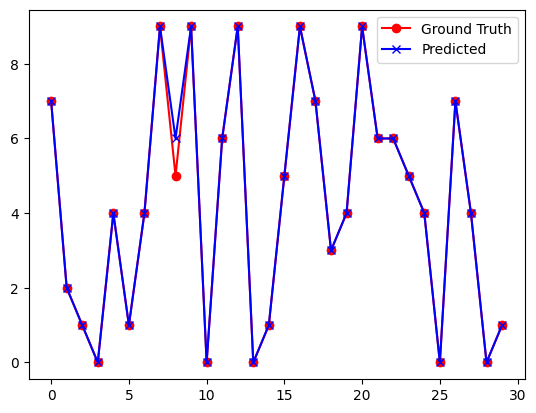

In [34]:
# Plot predictions and ground truth for first 30 samples
plt.plot(range(30), all_labels[:30], color='r', label='Ground Truth', linestyle='-', marker='o')
plt.plot(range(30), all_preds[:30], color='b', label='Predicted', linestyle='-', marker='x')
plt.legend()
plt.show()